In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [29]:
df=pd.read_csv("C:\\Users\\Hp\\Downloads\\Electric_Production.csv",index_col='DATE',parse_dates=['DATE'])
df.index.freq='MS'

In [30]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


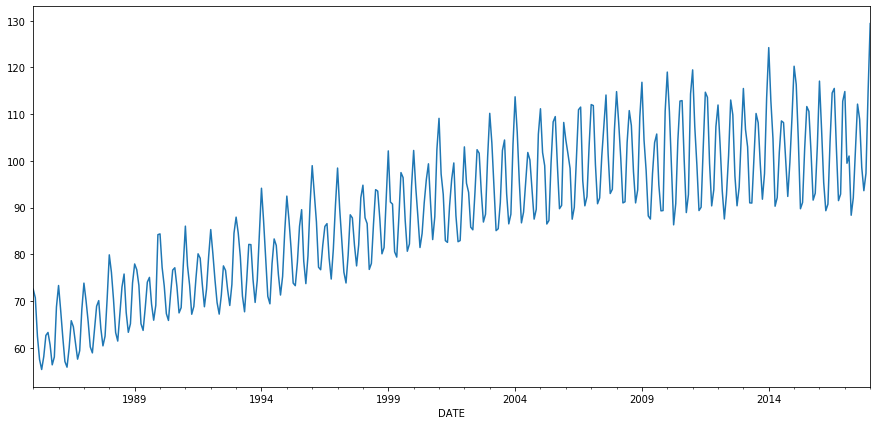

In [32]:
df['IPG2211A2N'].plot(figsize=(15,7)).autoscale(axis='x',tight=True)


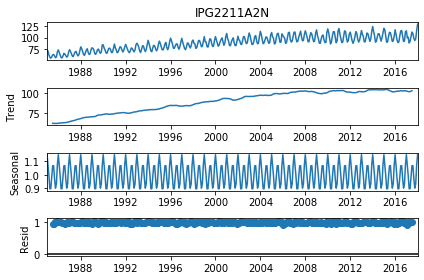

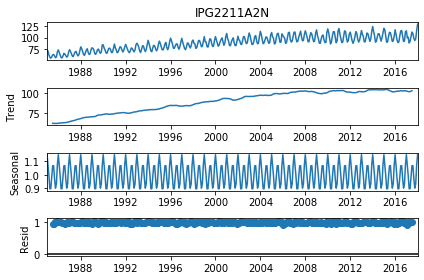

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig=seasonal_decompose(df["IPG2211A2N"],model='multiplicative')
fig.plot()

Stationary test using Dickey-fuller method

In [36]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df.IPG2211A2N)
print('p-value:',adf[1])


p-value: 0.1862146911658673


The p-value is greater than 0.05. hence, the data set is non-stationary and thus, differencing has to be done.

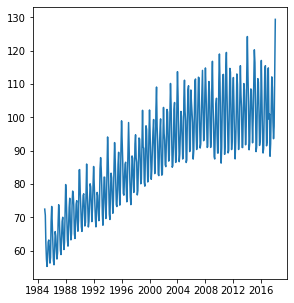

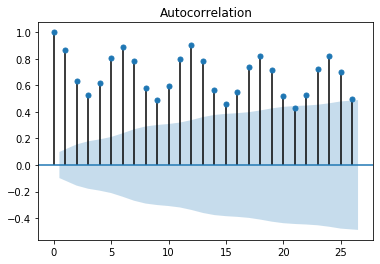

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,2)
plt.plot(df.IPG2211A2N)
plot_acf(df.IPG2211A2N);

In [38]:
# 1st order Differencing

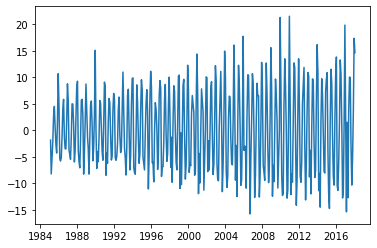

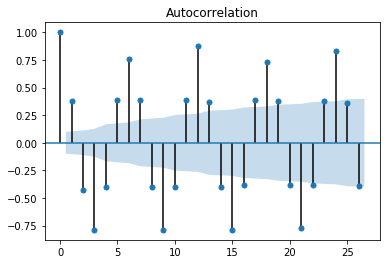

In [39]:
plt.plot(df.IPG2211A2N.diff().dropna())
plot_acf(df.IPG2211A2N.diff().dropna());

In [41]:
# 2nd order Differencing

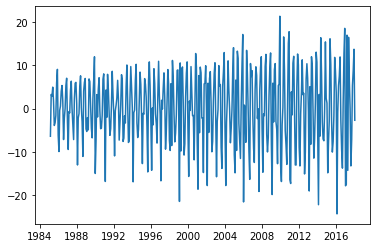

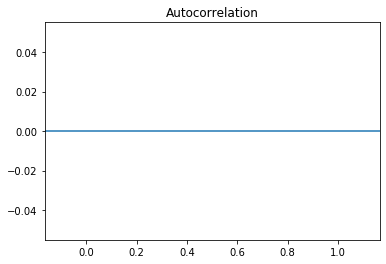

In [42]:
plt.plot(df.IPG2211A2N.diff().diff())
plot_acf(df.IPG2211A2N.diff().diff());

In [43]:
# Autoregression p parameter

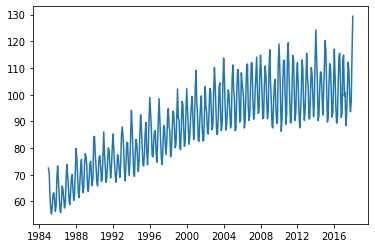

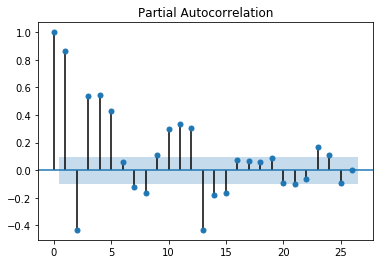

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.plot(df.IPG2211A2N)
plot_pacf(df.IPG2211A2N);

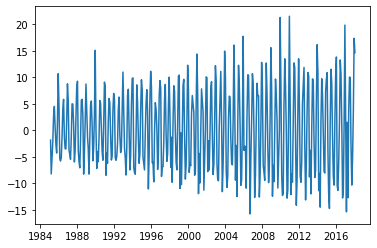

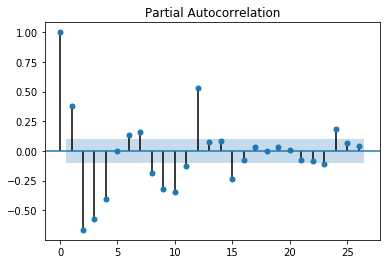

In [45]:
plt.plot(df.IPG2211A2N.diff().dropna())
plot_pacf(df.IPG2211A2N.diff().dropna());

In [46]:
# Moving average q parameter

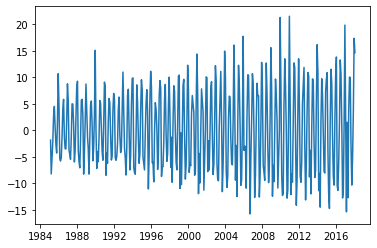

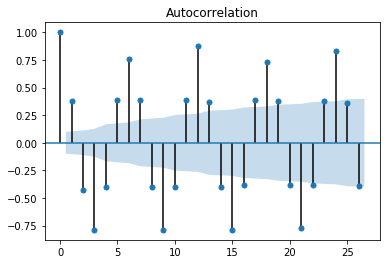

In [47]:
plt.plot(df.IPG2211A2N.diff().dropna())
plot_acf(df.IPG2211A2N.diff().dropna());

In [48]:
# ARIMA model

In [49]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(df.IPG2211A2N,order=(1,1,1))
model = arima.fit()
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.IPG2211A2N   No. Observations:                  396
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1327.994
Method:                       css-mle   S.D. of innovations              6.904
Date:                Mon, 21 Mar 2022   AIC                           2663.989
Time:                        10:17:54   BIC                           2679.914
Sample:                    02-01-1985   HQIC                          2670.298
                         - 01-01-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1108      0.020      5.607      0.000       0.072       0.149
ar.L1.D.IPG2211A2N     0.5414      0.045     11.919      0.000       0.452       0.630
ma.L1.D.IPG2211A2N  

In [50]:
# Check Accuracy

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<Figure size 720x720 with 0 Axes>

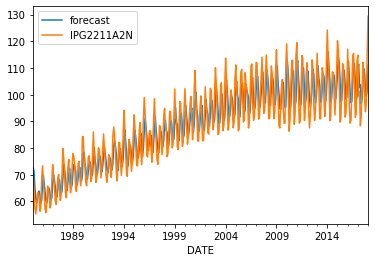

In [51]:
plt.figure(figsize=(10,10))
model.plot_predict();

In [52]:
# Model development

In [53]:
train_set = df[0:365]
test_set = df[365:]

In [54]:
arima = ARIMA(train_set,order=(1,1,1))
model = arima.fit()
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.IPG2211A2N   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1208.944
Method:                       css-mle   S.D. of innovations              6.683
Date:                Mon, 21 Mar 2022   AIC                           2425.888
Time:                        10:22:42   BIC                           2441.477
Sample:                    02-01-1985   HQIC                          2432.084
                         - 05-01-2015                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1164      0.019      6.198      0.000       0.080       0.153
ar.L1.D.IPG2211A2N     0.5427      0.047     11.602      0.000       0.451       0.634
ma.L1.D.IPG2211A2N  

In [55]:
fcast,se,confidencebands = model.forecast(32,alpha=0.01)

In [56]:
pred_set = pd.DataFrame(data=fcast,columns=['Value']) 
pred_set.index = test_set.index
pred_set.tail()

,Value
DATE,
2017-09-01,109.515402
2017-10-01,109.631834
2017-11-01,109.748266
2017-12-01,109.864697
2018-01-01,109.981129


Text(0, 0.5, 'Electricity production')

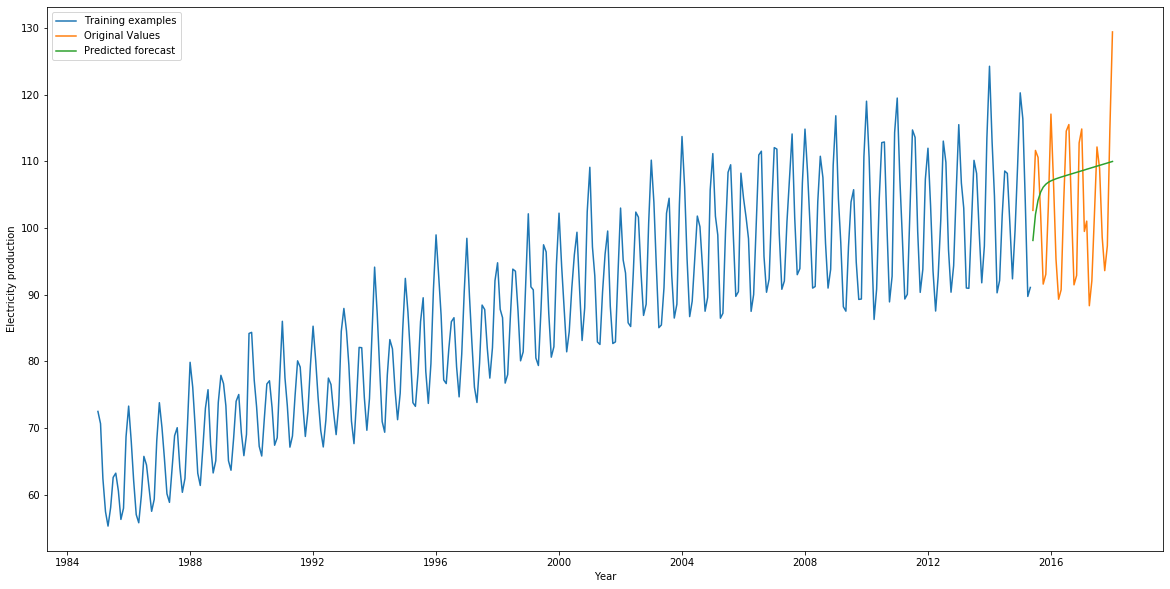

In [57]:
plt.figure(figsize=(20,10))
plt.plot(train_set,label='Training examples')
plt.plot(test_set,label='Original Values')
plt.plot(pred_set,label='Predicted forecast')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Electricity production')

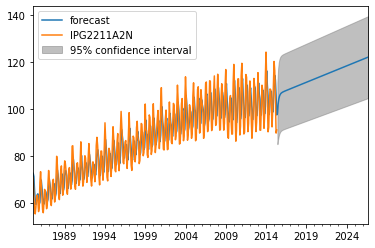

In [58]:
model.plot_predict(1,500);

Based on the plot, there is a steady increase in the amount of electric production in the upcoming years.